## Housing Price Prediction using Regularization Assignment

####  A US-based housing company named Surprise Housing  uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same, The company wants to know:  
- Which variables are significant in predicting the price of a house and how well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

#### The solution is divided into the following sections:
- Data Reading and Understanding
- Data Cleaning
- Data Visualization/Analysis
- Data Preparation
- Model Building and Evaluation
- Comparison between Ridge & Lasso Regression Models
- Results

## 1. Data Reading & Understanding 

In [1]:
# Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# ignore

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing_price = pd.read_csv('train (1).csv', keep_default_na=False)
housing_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [3]:
## Replacing all 'NA' of all above mentioned columns by 'None'
housing_price[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
     'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = housing_price[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                                                           'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                                                                           'GarageType', 'GarageFinish', 'GarageQual', 
                                                                           'GarageCond', 'PoolQC', 'Fence',
                                                                           'MiscFeature']].replace("NA", "None")
housing_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
housing_price.shape

(1460, 81)

In [5]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### From the above info, we can see that we have all the three types of data types - object, integer and float values in our dataset and no null values present

In [6]:
housing_price.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Data Cleaning

In [7]:
#Now, we need to convert few columns of category type to numeric and vice-versa

#Columns MSSubClass, OverallQual, OverallCond need to be converted to object type

housing_price[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_price[['MSSubClass', 'OverallQual', 
                                                                             'OverallCond']].astype('object')

In [8]:
#Column LotFrontage and MasVnrArea needs to be converted to numeric type.

housing_price['LotFrontage'] = pd.to_numeric(housing_price['LotFrontage'], errors='coerce')
housing_price['MasVnrArea'] = pd.to_numeric(housing_price['MasVnrArea'], errors='coerce')

In [9]:
#Lets check whether these above columns have changed
housing_price[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [10]:
housing_price.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# Our first step is to check for missing values if present and their percentage
housing_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

##### In the above info, we can see only two columns having missing values : LotFrontage and MasVnrArea, and we will perform missing value treatment on them.

## 3. Data Analysis/Visualization

In [12]:
# Let us first define our Target variable which is - 'SalePrice'

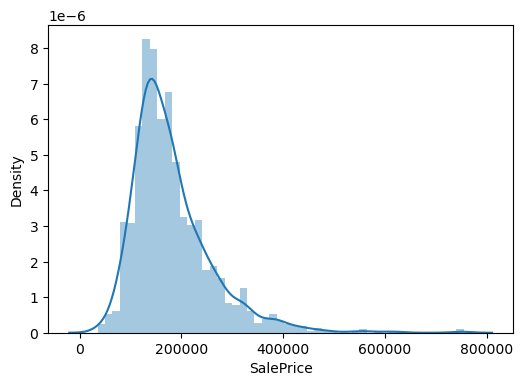

In [13]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[6,4])
sns.distplot(housing_price['SalePrice']);

In [14]:
# We can see our plot is little assymetric and right side skewed, so lets check the skewness
housing_price['SalePrice'].skew()

1.8828757597682129

In [15]:
# Skew value of Target variable is much greater than 1, so we will do log transform on our target variable
housing_price['SalePrice'] = np.log(housing_price['SalePrice'])

In [16]:
## Check the skewness of target variable again
housing_price['SalePrice'].skew()

0.12133506220520406

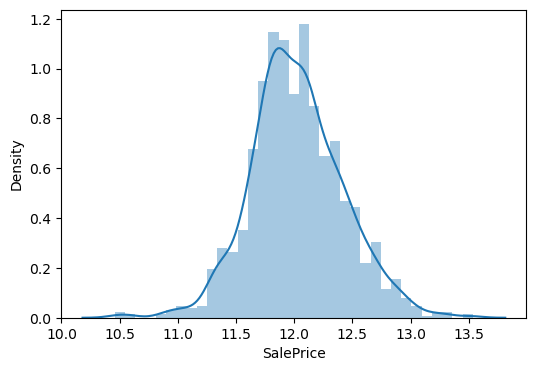

In [17]:
#Now, we can see the value is corrected and lesser than 1, So Plot the transformed target variable
plt.figure(figsize=[6,4])
sns.distplot(housing_price['SalePrice']);

In [18]:
#### Now we can see our Target variable is normally distributed and can be considered for further analysis

In [19]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
housing_price_num = housing_price.select_dtypes(include=['int64', 'float64'])
housing_price_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [20]:
## Extract categorical columns
housing_price_cat = housing_price.select_dtypes(include='object')
housing_price_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


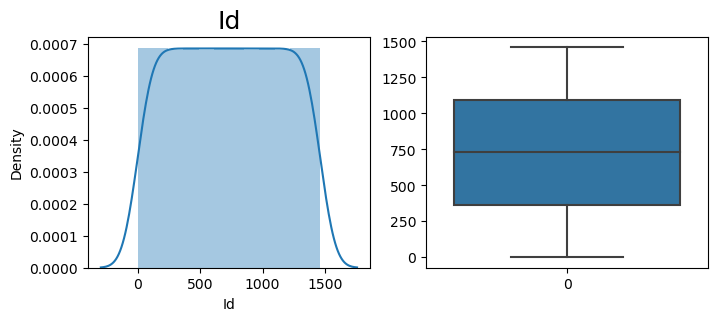

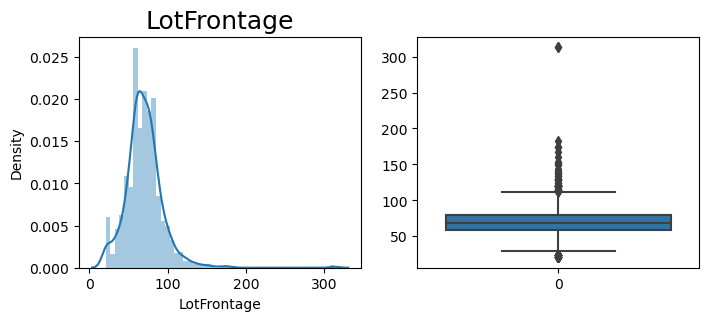

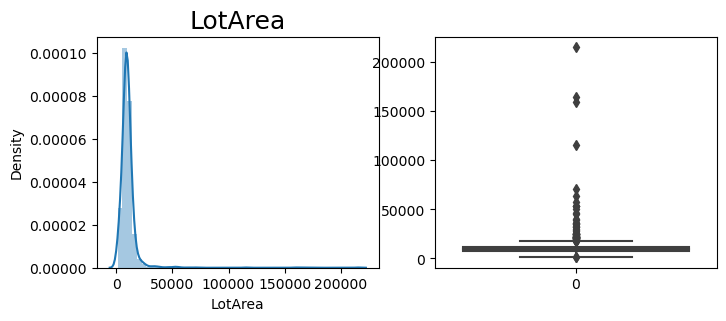

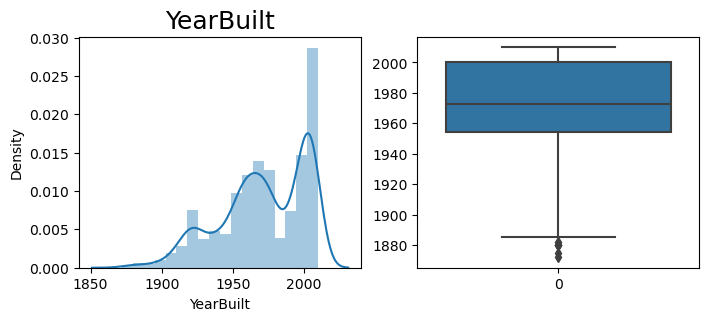

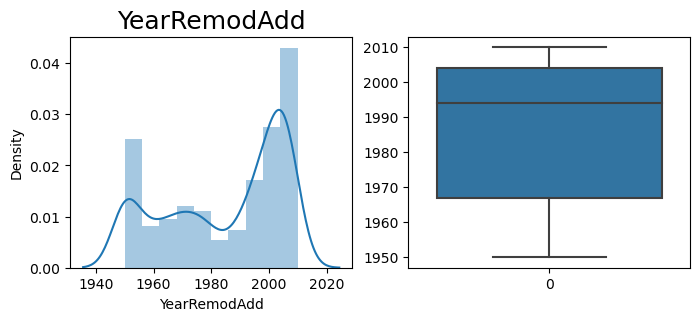

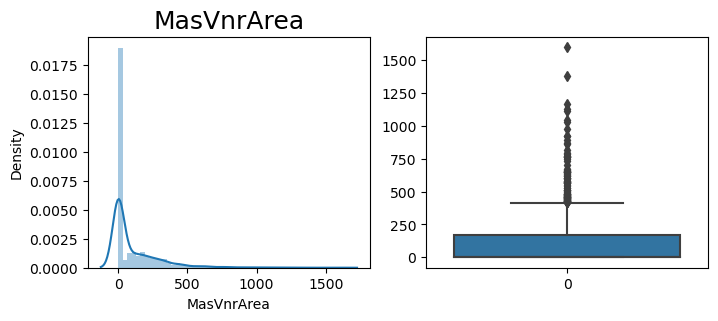

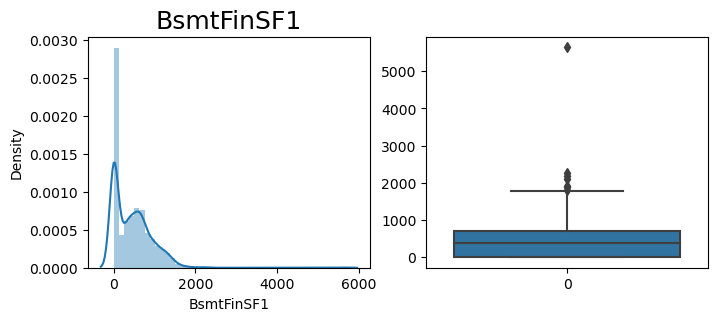

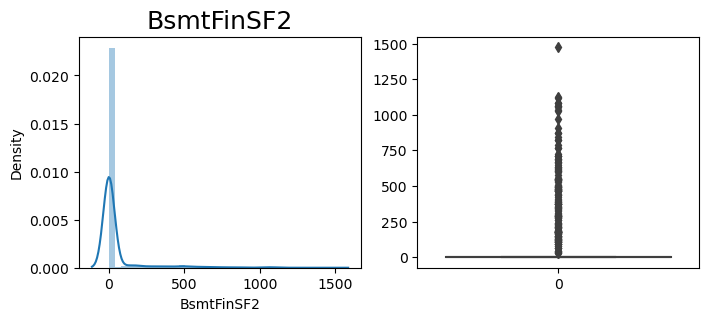

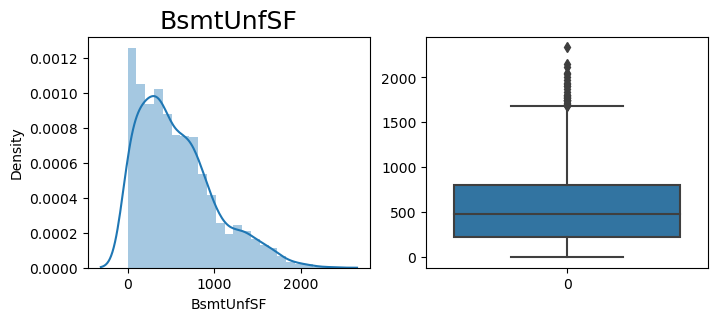

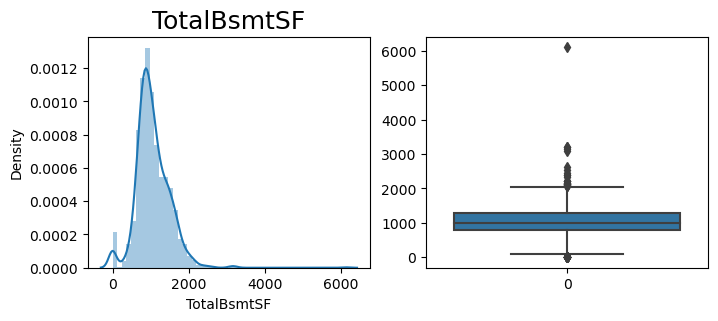

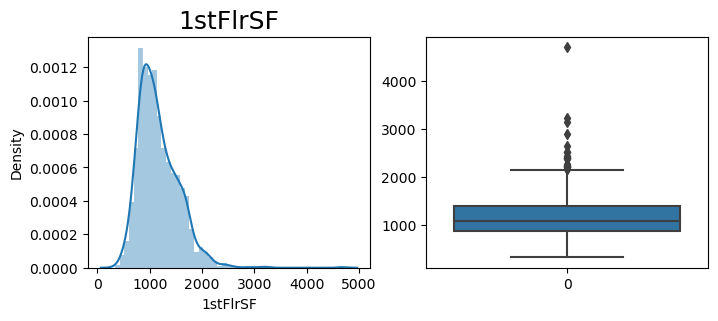

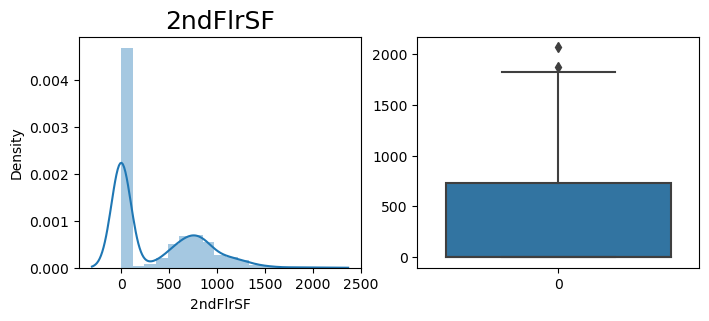

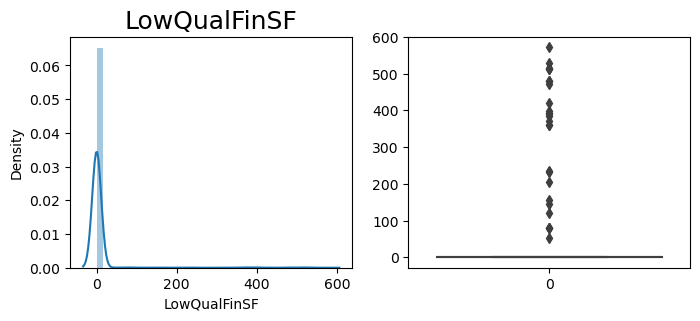

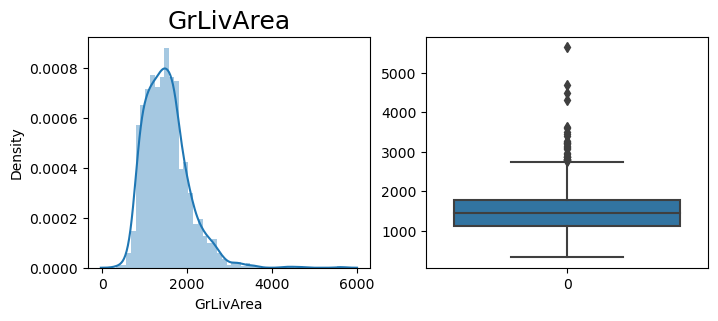

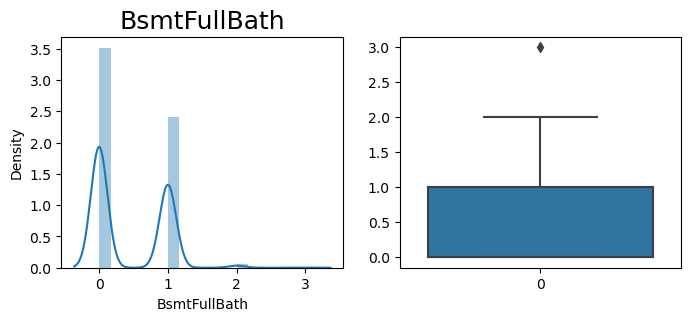

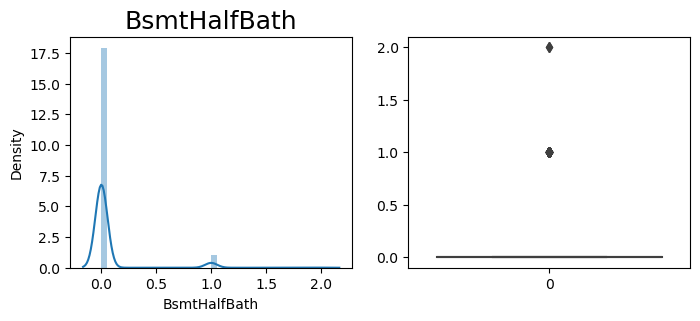

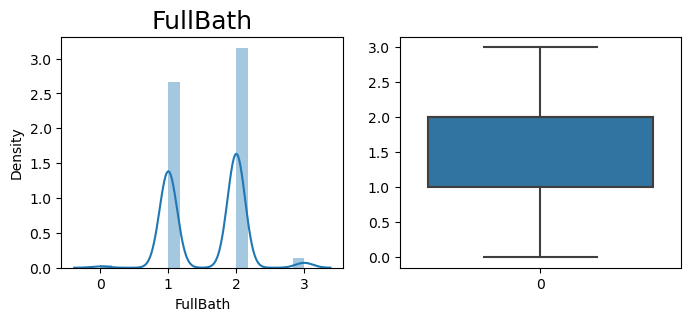

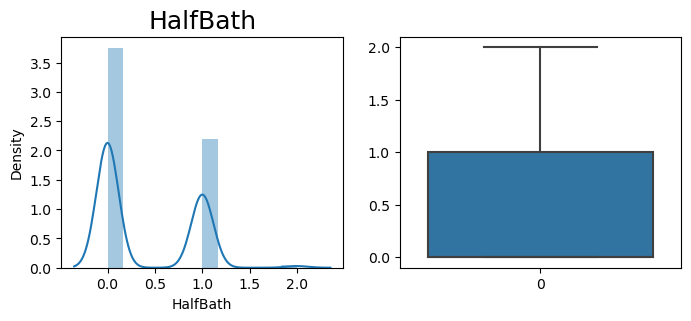

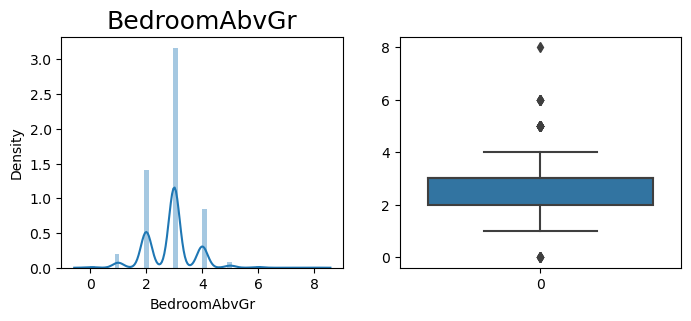

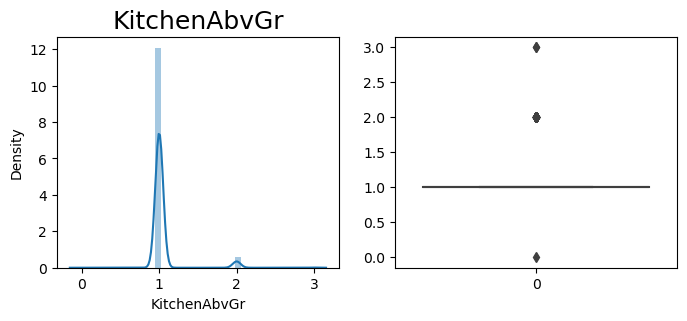

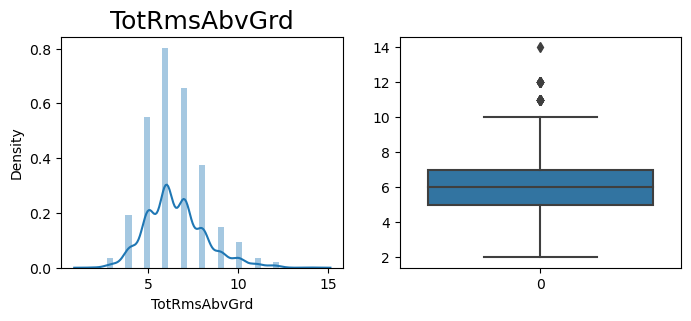

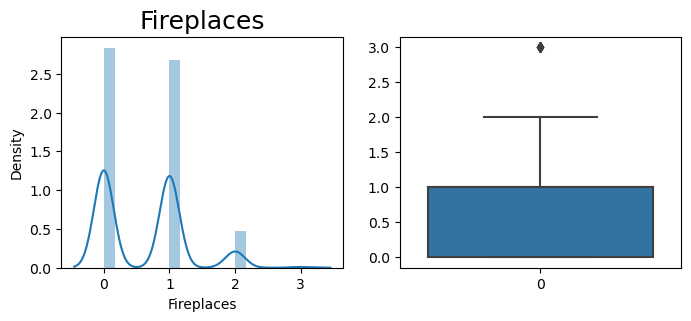

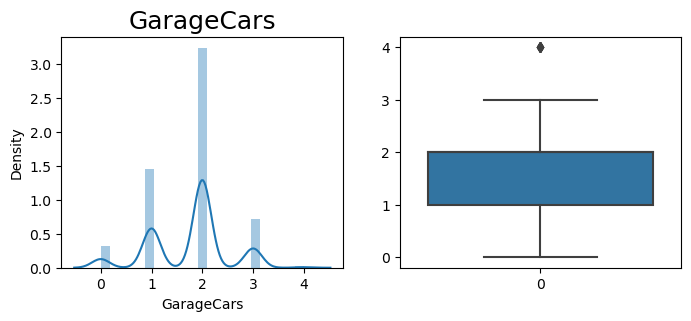

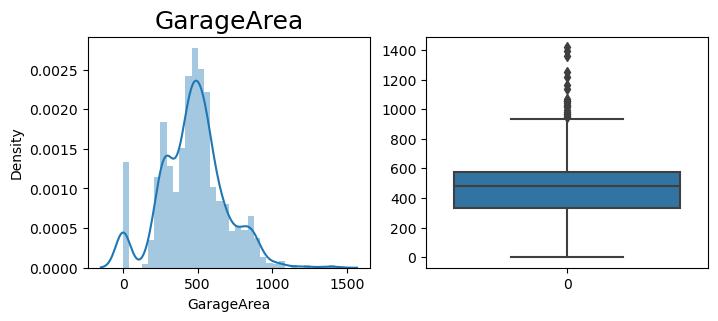

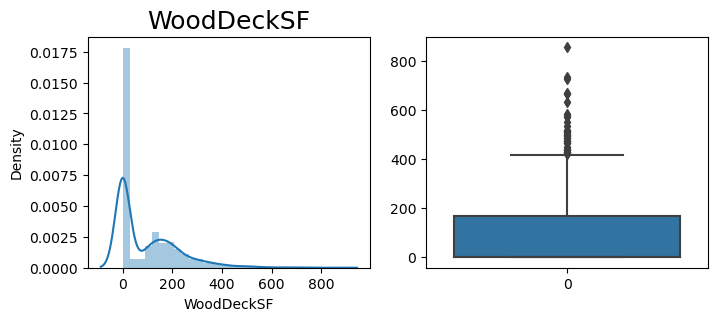

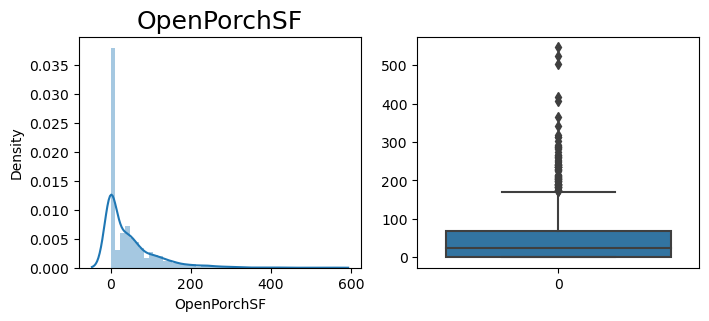

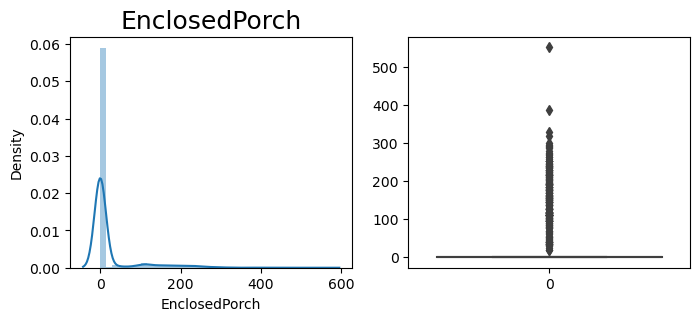

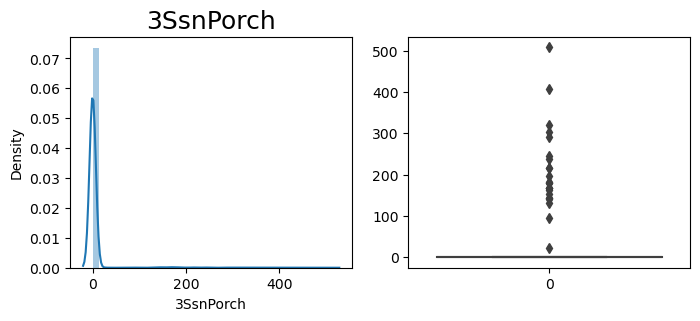

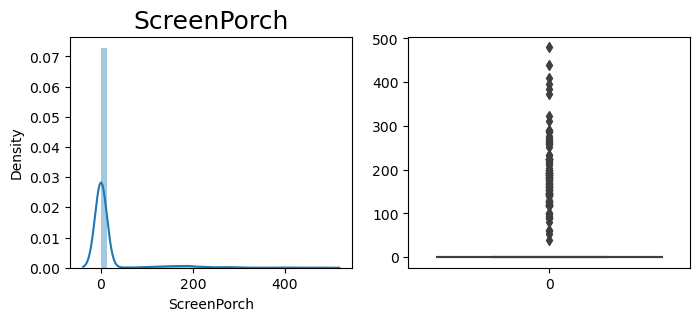

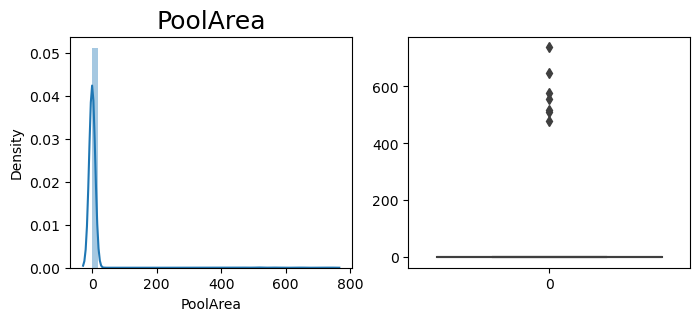

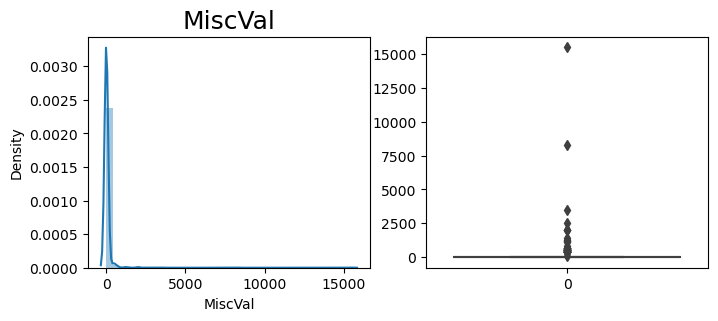

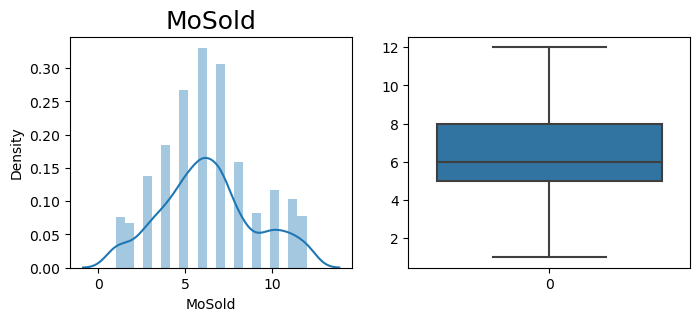

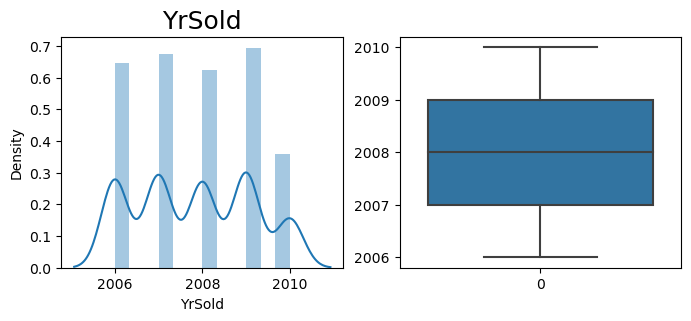

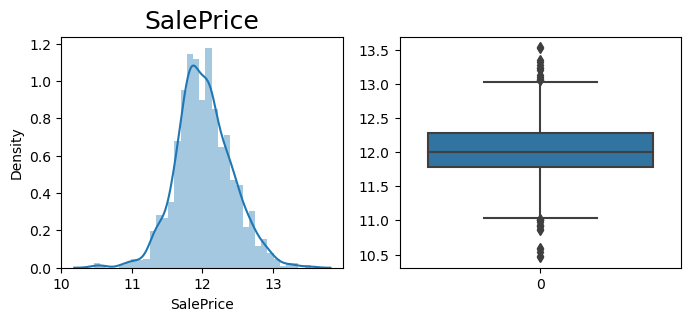

In [21]:
# View the distribution of all numeric variables using histograms and boxplots

for col in housing_price_num.columns:
    plt.figure(figsize=(8,3))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_price_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_price_num[col])
    plt.show()    


In [22]:
# Many numericals do not have normal distributions
# Also, outliers are present in most of the variables

In [23]:
## View the unique values of all Categorical columns
for col in housing_price_cat.columns:
    print(col)
    print(housing_price[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

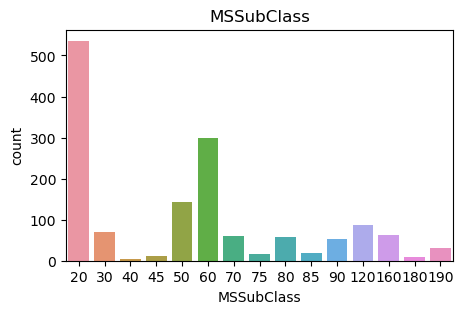

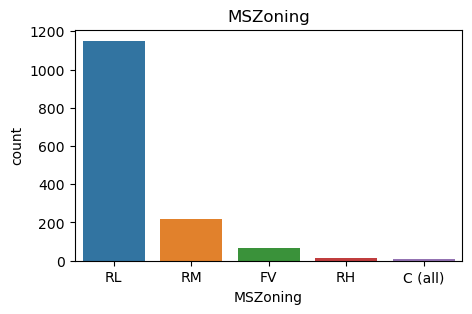

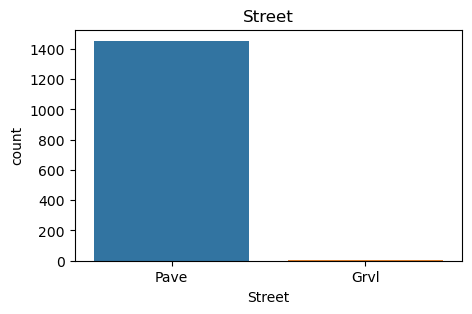

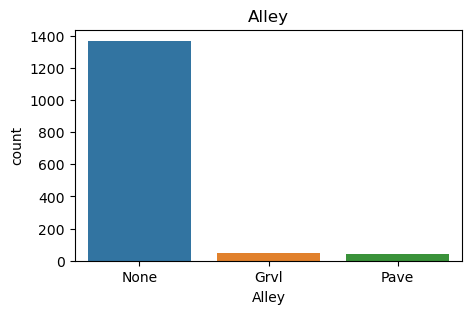

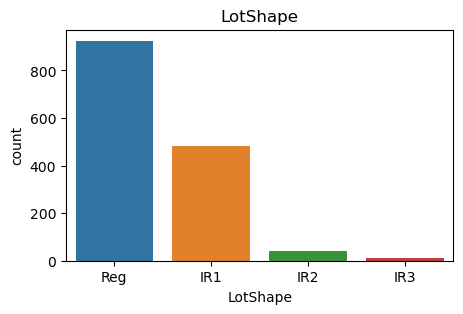

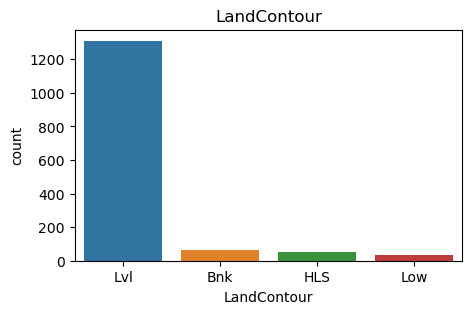

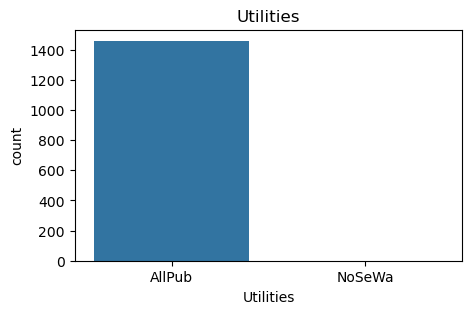

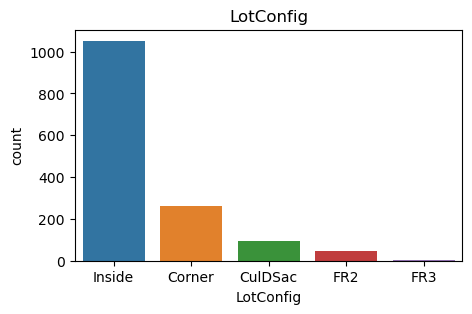

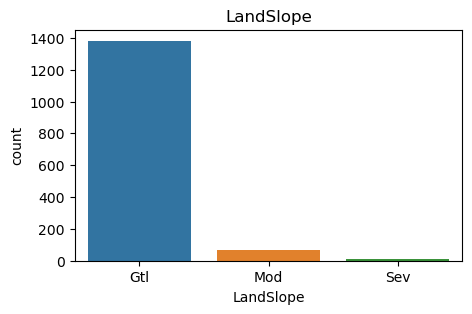

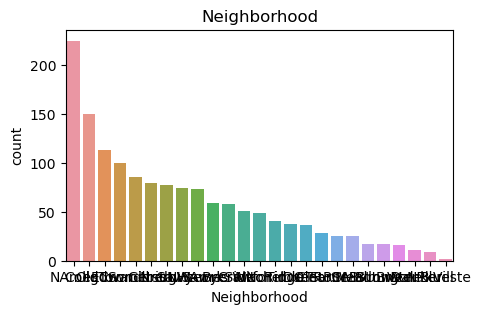

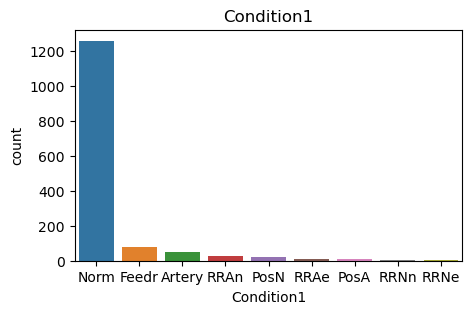

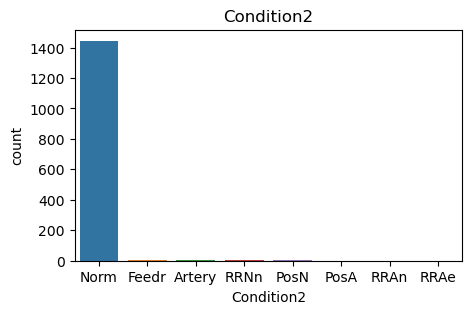

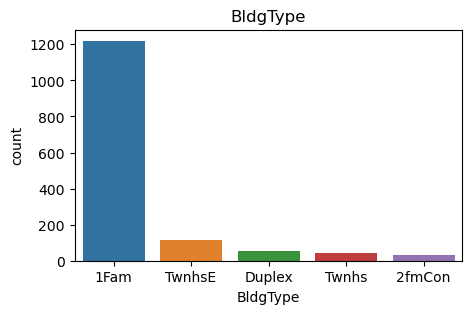

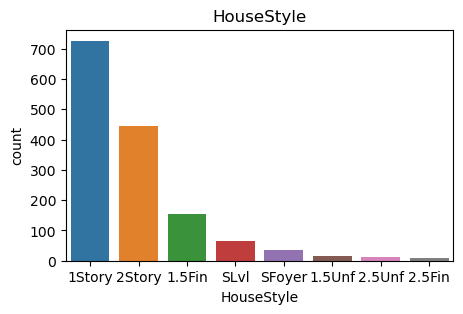

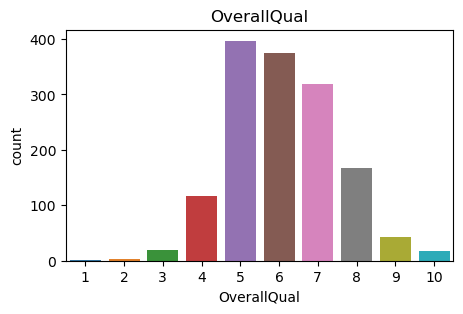

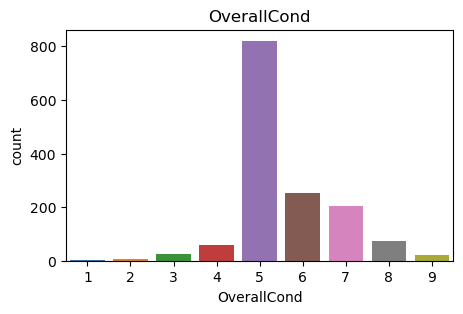

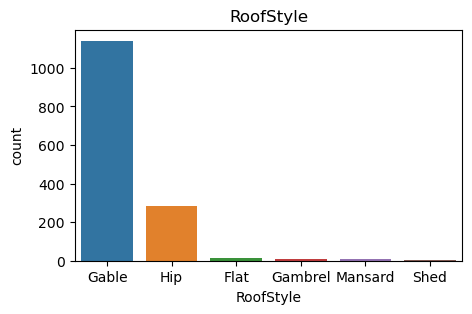

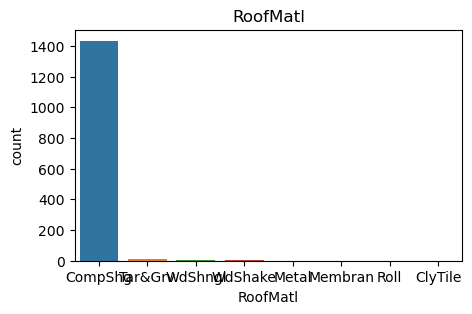

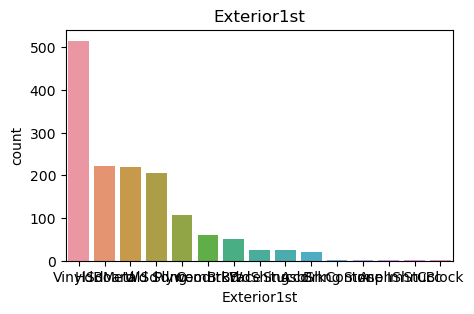

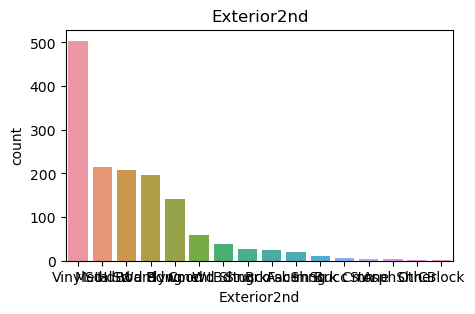

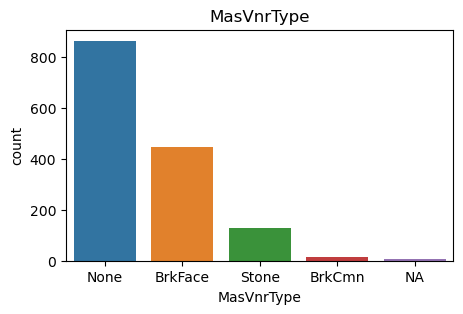

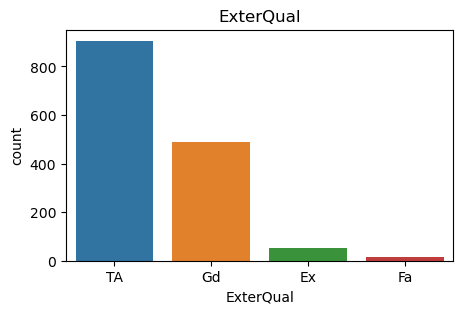

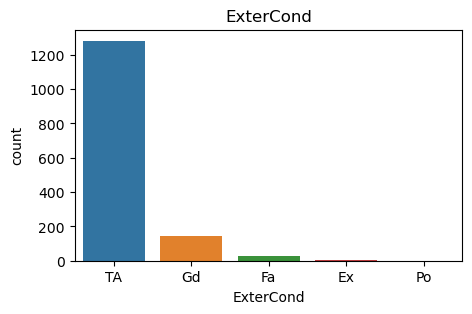

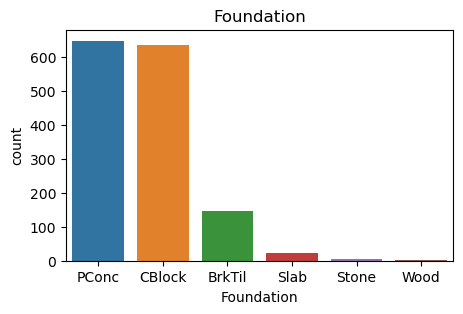

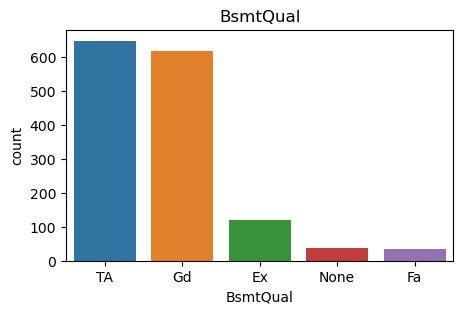

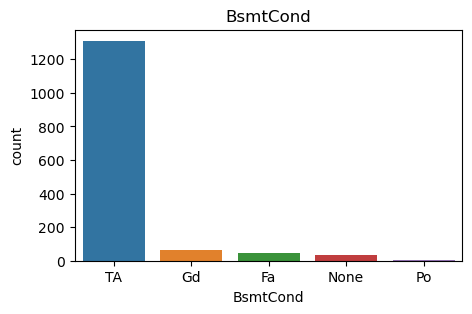

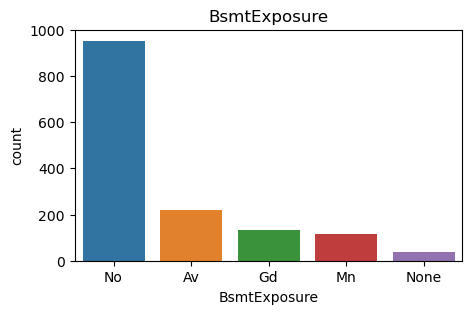

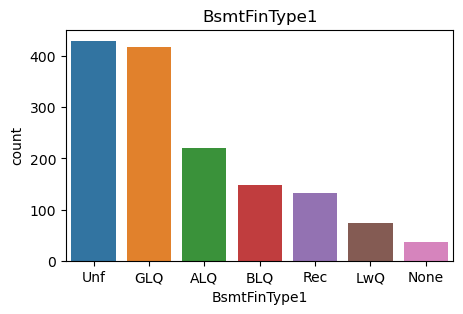

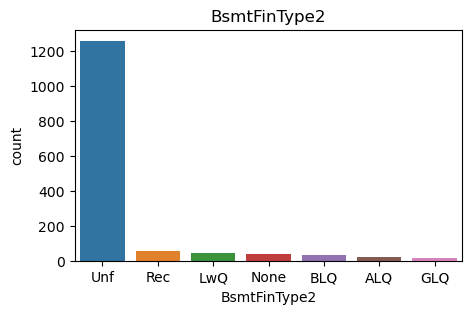

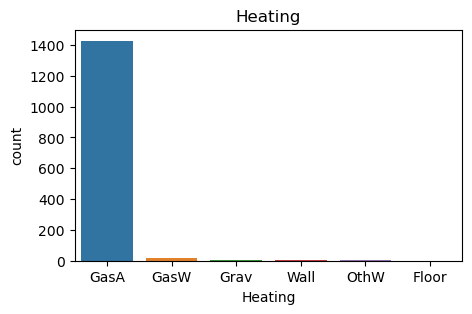

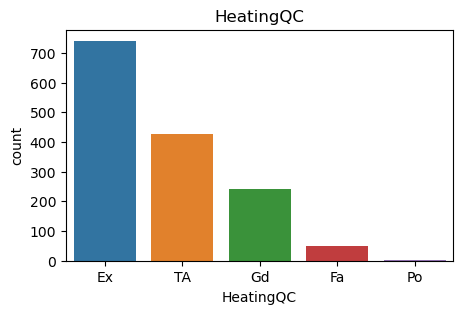

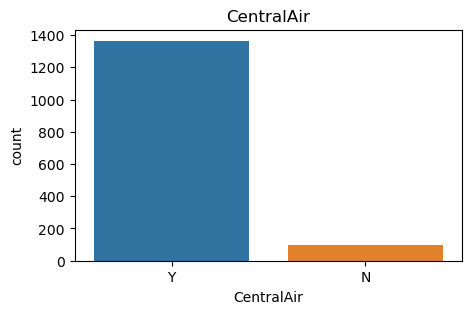

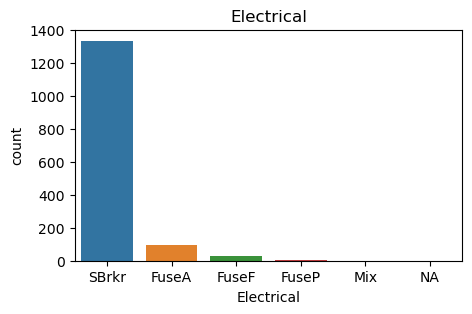

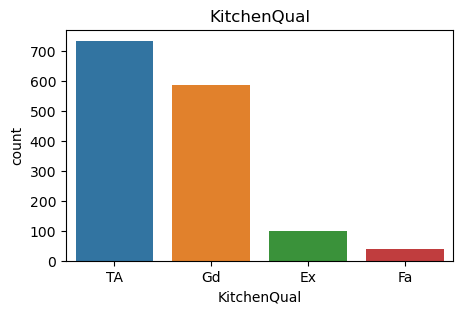

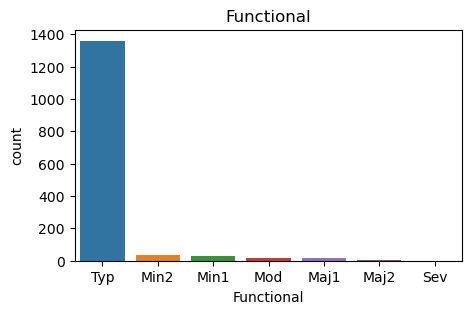

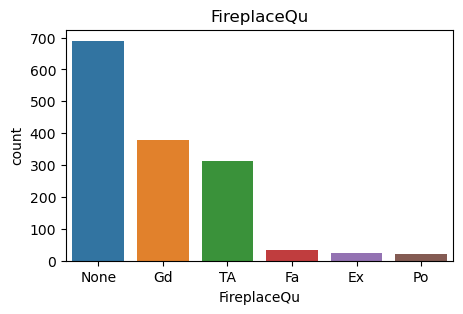

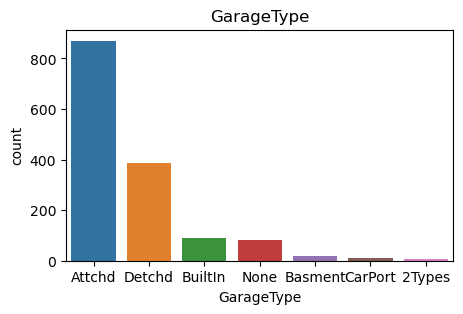

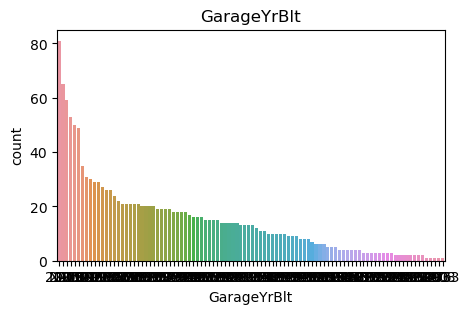

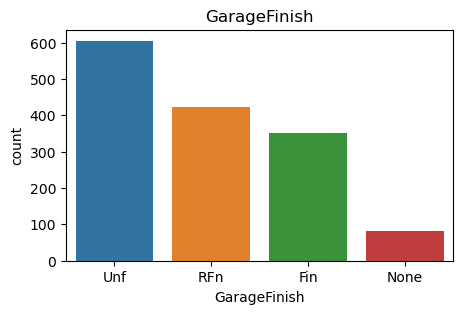

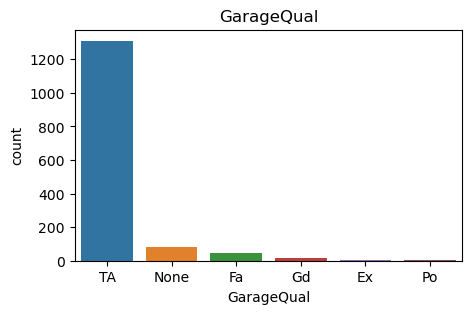

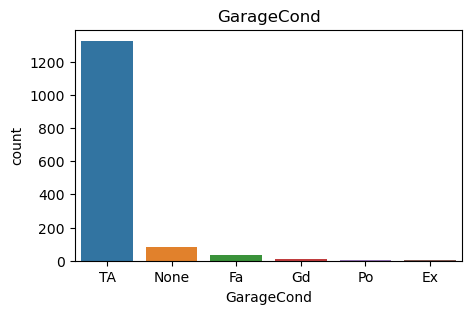

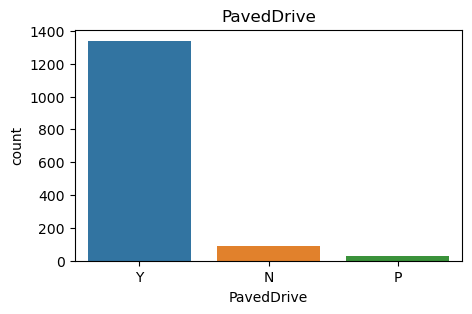

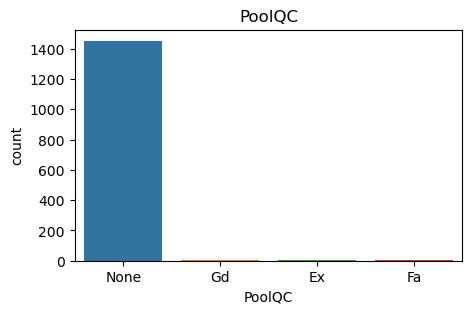

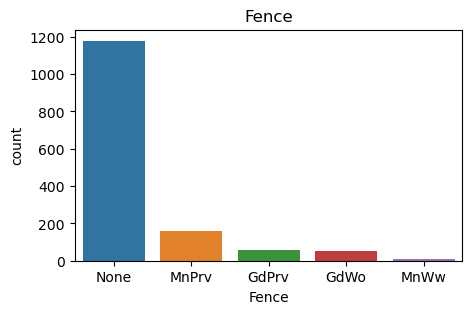

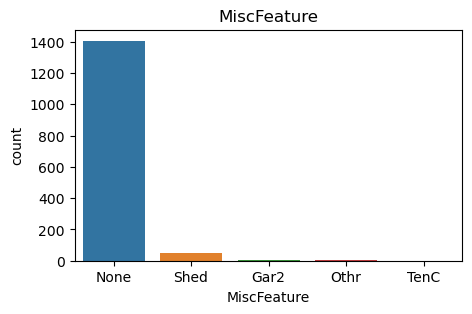

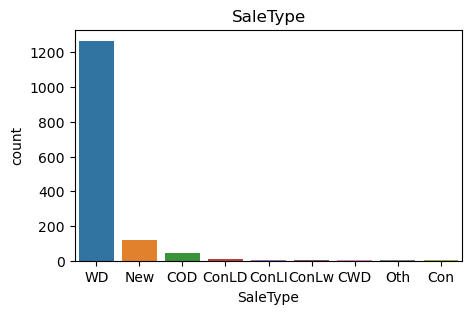

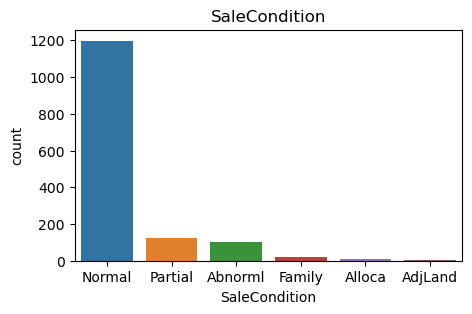

In [24]:
# Visualizing the levels of categorical columns using bar plots
for col in housing_price_cat.columns:
    plt.figure(figsize=(5,3))
    plt.title(col, fontdict={'fontsize': 12})
    sns.barplot(x=housing_price_cat[col].value_counts().index, y=housing_price_cat[col].value_counts())
    plt.show()

##### In the above plots, all the columns are having number of unique values, so no column can be removed

### Bivariate Analysis

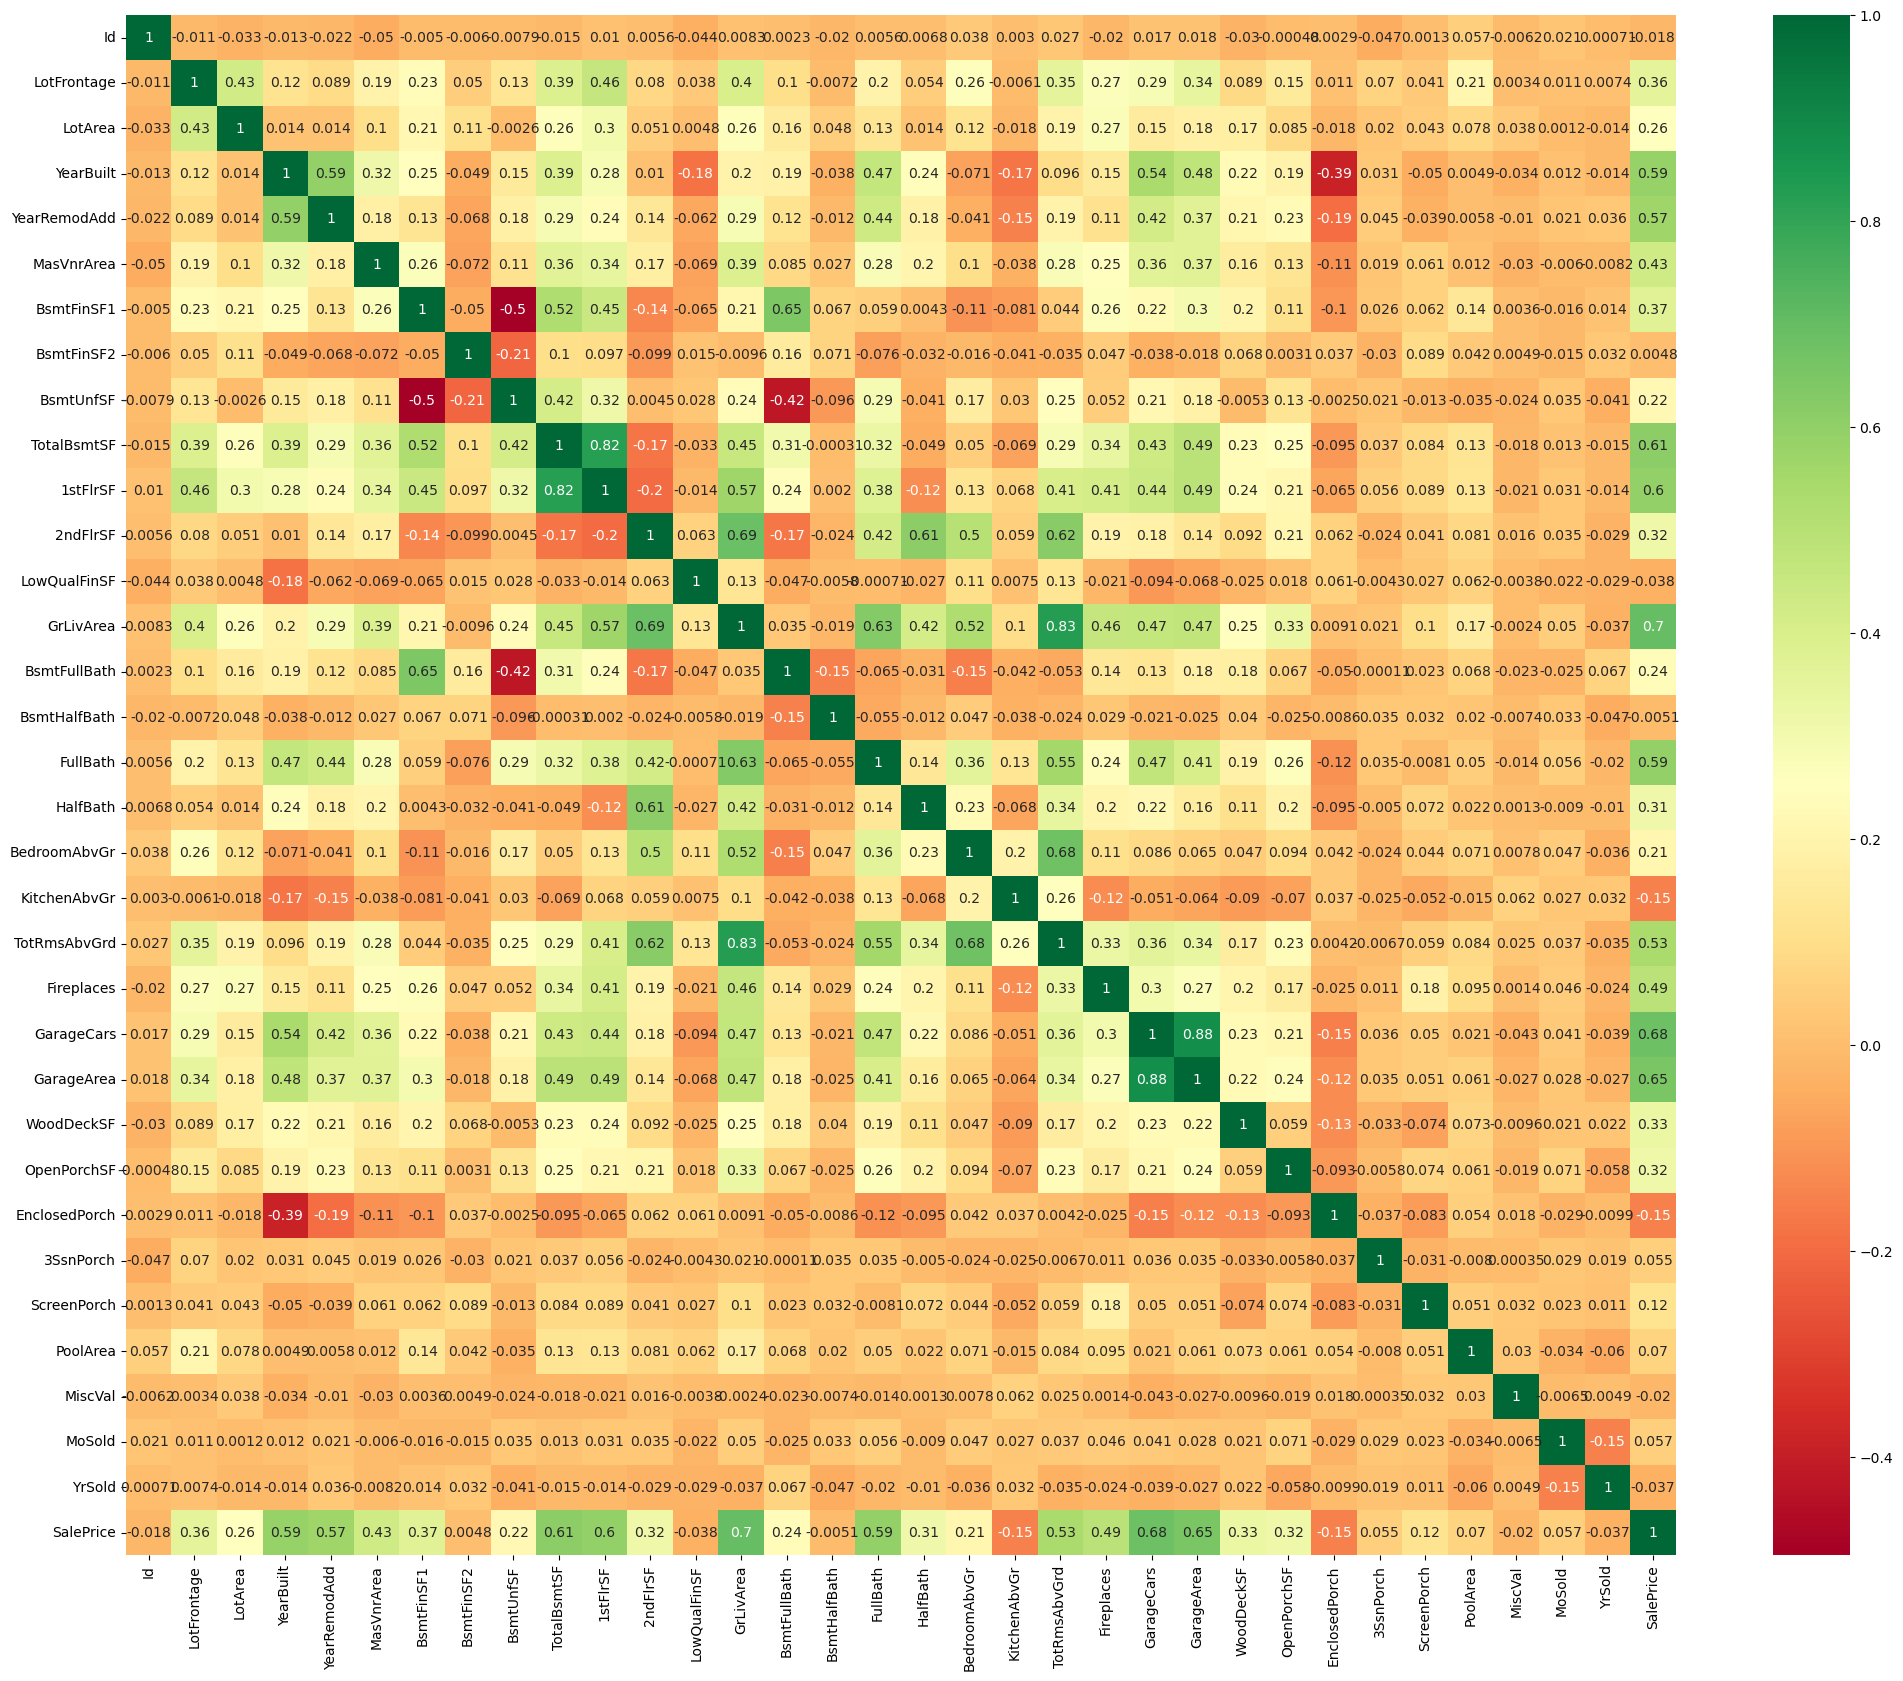

In [25]:
# Lets plot the heatmap to fin correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(housing_price_num.corr(), annot=True, cmap='RdYlGn');

#### We can draw following conclusions from above heatmap - 
- Many columns are highly correlated with each other
- Target variable is highly correlated with GrLivArea, GarageCars and GarageArea
- As we can see multicollinearity in our data, Ridge regression would be better to use

## 4. Data Preparation

In [26]:
### lets add some new features to data, i.e to create new column for age of house
housing_price['Age'] = housing_price['YrSold'] - housing_price['YearBuilt']

In [27]:
# We can drop the two columns from which we created new one
housing_price.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [28]:
housing_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,WD,Normal,12.429216,8


In [30]:
#### Lets perform Missing Value treatment
housing_price.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 80, dtype: int64

In [31]:
# we have only two variables with missing values, so lets replace their na values by mean values
housing_price['LotFrontage'].fillna(housing_price['LotFrontage'].mean(), inplace=True)
housing_price['MasVnrArea'].fillna(housing_price['MasVnrArea'].mean(), inplace=True)

In [32]:
housing_price.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 80, dtype: int64

##### Now our data is cleaned with all the errors and ready for further analysis

#### Dummy Variable Creation

In [33]:
# Separate the categorical and numerical features again from original dataframe because we have added one feature and removed two from original data)
housing_price_num = housing_price.select_dtypes(include=['int64', 'float64'])
housing_price_cat = housing_price.select_dtypes(include='object')

In [34]:
# We use One hot encoding for the categorical columns here
housing_price_cat_encoded = pd.get_dummies(housing_price_cat, drop_first=True)
housing_price_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [35]:
# Lets check the dimensions again
housing_price_cat_encoded.shape

(1460, 353)

#### Outliers Treatment

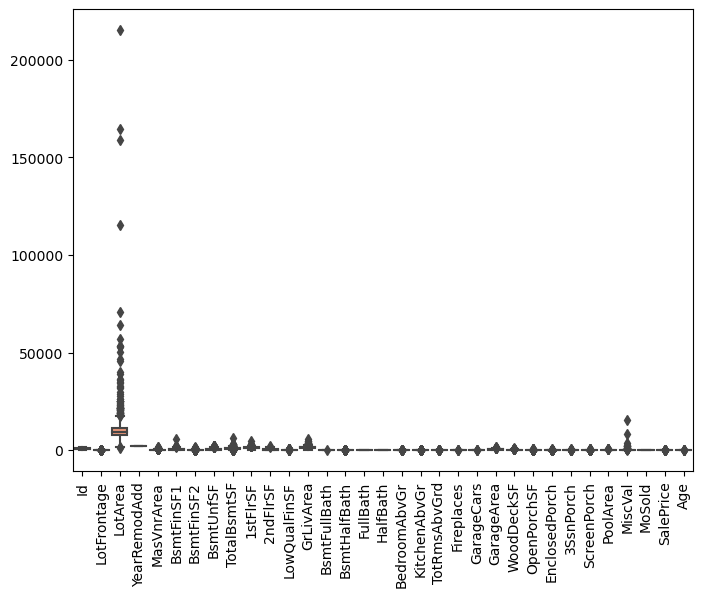

In [36]:
#Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[8,6])
plt.xticks(rotation=90)
sns.boxplot(data=housing_price_num);

In [37]:
# Let us consider the lower rangeupto 5% and upper range upto 95%
for col in housing_price_num.columns:
    housing_price_num[col][housing_price_num[col] <= housing_price_num[col].quantile(0.05)] = housing_price_num[col].quantile(0.05)
    housing_price_num[col][housing_price_num[col] >= housing_price_num[col].quantile(0.95)] = housing_price_num[col].quantile(0.95)

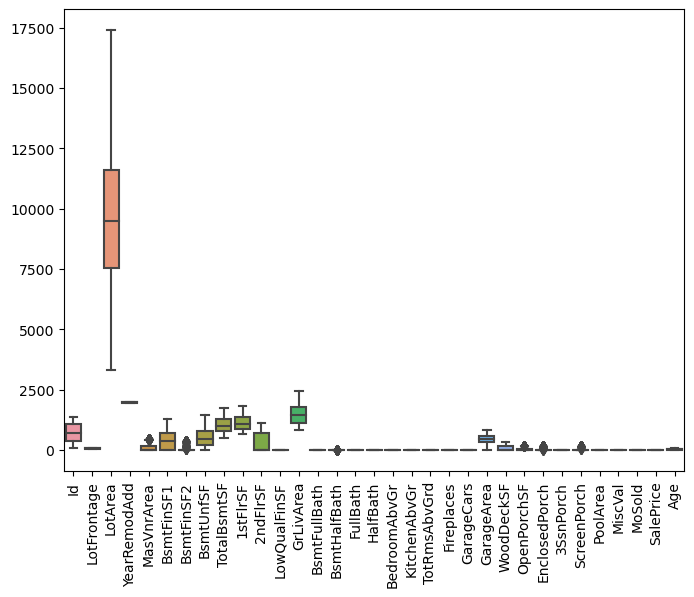

In [39]:
# Let us check the boxplots again to see if outliers have been treated properly
plt.figure(figsize=[8,6])
plt.xticks(rotation=90)
sns.boxplot(data=housing_price_num);

##### So, we can see that all the outliers are removed from the data

In [40]:
# Lets concatenate the outlier treated numerical columns with one hot encoded categorical columns

housing_price = pd.concat([housing_price_num, housing_price_cat_encoded], axis=1)

In [41]:
housing_price.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,73.95,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,...,False,False,False,False,True,False,False,False,True,False
1,73.95,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,...,False,False,False,False,True,False,False,False,True,False
2,73.95,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,...,False,False,False,False,True,False,False,False,True,False
3,73.95,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,...,False,False,False,False,True,False,False,False,False,False
4,73.95,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,...,False,False,False,False,True,False,False,False,True,False


##### So, we have performed all the analysis and cleaning in our data. Now, our data is completely prepared for model building

## 5. Model Building & Evaluation

#### Splitting the Data

In [42]:
# X contains all the independent variables, excluding targe variable i.e SalePrice and also ID column which is not useful
X = housing_price.drop(['Id', 'SalePrice'], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,854.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,866.0,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,756.0,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,...,False,False,False,False,True,False,False,False,True,False


In [43]:
# y contains our target variable
y = housing_price['SalePrice'].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### Train-Test Split

In [44]:
# Splitting X and y into 80% train data and 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [45]:
# Lets check dimensions of train set
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [47]:
# Checking dimensions of test set
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


#### Scaling numerical columns

In [48]:
# Lets create the list of numerical columns which need to scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [50]:
#Create an scaling instance, import standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model 1 Ridge Regression

In [51]:
## Lets define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    
    ## Residual sum of squares(RSS) of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error(MSE) of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error(RMSE) for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    
    return metric

In [52]:
## Now to create a Ridge Regression model, we perform a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
## Lets view the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [54]:
## See the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.03756857, 0.04376845, 0.04169164, 0.03435054, 0.03232212,
        0.02501831, 0.02812352, 0.02788844, 0.02855077, 0.02309957,
        0.03134904, 0.02837849, 0.02495041, 0.02808471, 0.02500997,
        0.021873  , 0.0250041 , 0.02966962, 0.01960878, 0.03446965,
        0.02819791, 0.02766738, 0.03455806, 0.02501264, 0.03142114,
        0.03135061, 0.02811489, 0.02498927]),
 'std_fit_time': array([0.00766869, 0.00630294, 0.00657136, 0.00622361, 0.00283291,
        0.00766026, 0.00624998, 0.00837711, 0.00625439, 0.00702703,
        0.00010699, 0.00626077, 0.00763959, 0.00622104, 0.0076591 ,
        0.0076559 , 0.00765703, 0.00376671, 0.00453893, 0.01177   ,
        0.01183213, 0.0061612 , 0.00638983, 0.00764474, 0.00019789,
        0.01712097, 0.00624555, 0.0076459 ]),
 'mean_score_time': array([0.00945916, 0.00937643, 0.00751262, 0.00312686, 0.00865827,
        0.00624952, 0.01570811, 0.00753703, 0.00625877, 0.00938005,
        0.0031714 , 0.0031323 , 0.009362

#### Hence, we get optimum value of alpha as 10. Now we will build a ridge regression model using this value.

In [55]:
ridge = Ridge(alpha=10)

In [56]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [57]:
ridge.coef_

array([ 3.80246144e-03,  2.21886634e-02,  2.53160158e-02, -2.77748769e-03,
        1.14303183e-02,  1.48442227e-03, -1.24158000e-02,  5.50635983e-02,
        1.96578211e-02,  3.93182060e-02,  0.00000000e+00,  7.58703035e-02,
        1.01330937e-02, -8.11952925e-04,  1.20426370e-02,  1.10987317e-02,
        9.58752107e-04,  0.00000000e+00, -2.86199760e-03,  1.17491188e-02,
        9.83024131e-03,  2.25710353e-02,  1.20986938e-02,  7.75633602e-03,
        2.96800250e-03,  0.00000000e+00,  7.01780264e-03,  0.00000000e+00,
        0.00000000e+00,  1.44743034e-03, -5.13571529e-02, -3.79752552e-02,
       -2.87630935e-03,  9.41814607e-04,  2.20795165e-03, -6.93243319e-03,
        3.96254608e-02,  1.52360932e-02,  5.62713305e-03,  1.23637373e-02,
       -2.62397130e-02,  3.08858843e-03, -4.86326089e-02, -2.42375400e-02,
       -2.00698787e-02,  4.51383065e-02,  2.36335658e-02,  1.73872888e-02,
       -2.44945757e-02, -5.75535981e-03, -4.39017059e-03,  1.35889688e-02,
        3.60290565e-03, -

In [59]:
## Making predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [60]:
## Checking metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 8.29
RSS (Test) = 3.20
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


In [61]:
# Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037569,0.007669,0.009459,0.007725,0.0001,{'alpha': 0.0001},-0.111552,-0.091095,-0.102948,-0.081774,...,-0.095066,0.010741,27,-0.044874,-0.049786,-0.049654,-0.051869,-0.050129,-0.049262,0.002334
1,0.043768,0.006303,0.009376,0.007656,0.001,{'alpha': 0.001},-0.111005,-0.089730,-0.102884,-0.081932,...,-0.094668,0.010661,26,-0.044889,-0.049821,-0.049656,-0.051891,-0.050134,-0.049278,0.002335
2,0.041692,0.006571,0.007513,0.006382,0.01,{'alpha': 0.01},-0.109728,-0.086436,-0.102304,-0.082194,...,-0.093422,0.010661,25,-0.044941,-0.050005,-0.049673,-0.051982,-0.050208,-0.049362,0.002351
3,0.034351,0.006224,0.003127,0.006254,0.05,{'alpha': 0.05},-0.107803,-0.084465,-0.100414,-0.081633,...,-0.091682,0.010457,23,-0.045099,-0.050438,-0.049752,-0.052147,-0.050671,-0.049621,0.002392
4,0.032322,0.002833,0.008658,0.007192,0.1,{'alpha': 0.1},-0.106045,-0.083431,-0.098742,-0.080917,...,-0.090310,0.010164,22,-0.045310,-0.050916,-0.049836,-0.052358,-0.051119,-0.049908,0.002434
5,0.025018,0.007660,0.006250,0.007654,0.2,{'alpha': 0.2},-0.103444,-0.082120,-0.096305,-0.079892,...,-0.088447,0.009627,21,-0.045816,-0.051634,-0.050030,-0.052766,-0.051849,-0.050419,0.002465
6,0.028124,0.006250,0.015708,0.010015,0.3,{'alpha': 0.3},-0.101612,-0.081045,-0.094542,-0.079010,...,-0.087133,0.009235,20,-0.046269,-0.052202,-0.050210,-0.053070,-0.052371,-0.050824,0.002468
7,0.027888,0.008377,0.007537,0.005158,0.4,{'alpha': 0.4},-0.100142,-0.080164,-0.093236,-0.078224,...,-0.086093,0.008946,19,-0.046655,-0.052662,-0.050371,-0.053353,-0.052789,-0.051166,0.002475
8,0.028551,0.006254,0.006259,0.007665,0.5,{'alpha': 0.5},-0.098994,-0.079456,-0.092116,-0.077515,...,-0.085250,0.008713,18,-0.047027,-0.053038,-0.050532,-0.053627,-0.053128,-0.051470,0.002469
9,0.023100,0.007027,0.009380,0.007659,0.6,{'alpha': 0.6},-0.098007,-0.078904,-0.091128,-0.076873,...,-0.084523,0.008509,17,-0.047360,-0.053352,-0.050685,-0.053878,-0.053421,-0.051739,0.002462


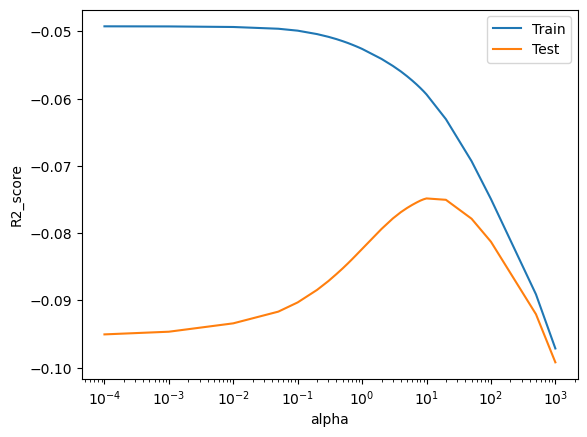

In [62]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error. 
#### From graph also, it is apparent that the optimal value of alpha is 10.

### Model 2 Lasso Regression

In [63]:
## Now to create a Lasso model, we perform cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
## Lets view the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [65]:
## See the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.29375439, 0.16448174, 0.05137234, 0.07262158, 0.05324602,
        0.04414048, 0.02495246, 0.04079595, 0.02342052, 0.01457229,
        0.0406795 , 0.02185235, 0.02505751, 0.04455919, 0.03145285,
        0.04461813, 0.02518873, 0.04664001, 0.04083452, 0.04093566,
        0.0301064 , 0.03151746, 0.0314065 , 0.03127785, 0.03860102,
        0.02825098, 0.0250607 , 0.02196035]),
 'std_fit_time': array([6.55794876e-02, 1.62274279e-02, 2.00581884e-02, 1.32504562e-02,
        2.12313268e-02, 4.17002629e-02, 7.61151231e-03, 2.13859428e-02,
        7.13439288e-03, 2.73858221e-03, 1.88527860e-02, 7.67742193e-03,
        7.69189542e-03, 2.70627153e-02, 2.43465036e-02, 2.65152459e-02,
        7.80133056e-03, 2.19597524e-02, 1.12372913e-02, 2.11351904e-02,
        1.75994733e-02, 9.96486660e-03, 1.71112291e-02, 4.93625272e-05,
        2.82848936e-02, 6.25362468e-03, 1.88438198e-02, 7.62815705e-03]),
 'mean_score_time': array([0.00809765, 0.00762701, 0.01489434, 0.00404358, 

#### Hence, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [66]:
lasso = Lasso(alpha=0.001)

In [67]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [68]:
lasso.coef_

array([ 1.75049854e-03,  2.12845951e-02,  2.90711344e-02,  0.00000000e+00,
        2.36518749e-02,  2.81788243e-03, -4.73231206e-04,  5.44740095e-02,
        0.00000000e+00,  1.33742926e-02,  0.00000000e+00,  1.01413352e-01,
        1.07193117e-02,  0.00000000e+00,  3.89127525e-03,  9.38494625e-03,
       -0.00000000e+00,  0.00000000e+00, -8.31155976e-04,  1.83146126e-02,
        1.17534257e-02,  2.34972526e-02,  1.29992541e-02,  7.06357738e-03,
        3.18053195e-03,  0.00000000e+00,  6.63004700e-03,  0.00000000e+00,
        0.00000000e+00,  9.19375006e-05, -5.74626173e-02, -1.29885969e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.02072249e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64556417e-02,  0.00000000e+00, -3.45454897e-02, -0.00000000e+00,
       -0.00000000e+00,  2.04665451e-02,  0.00000000e+00,  0.00000000e+00,
       -4.47372811e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [69]:
## Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [70]:
#Lets check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.91
RSS (Train) = 10.94
RSS (Test) = 3.31
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [71]:
# Lets plot r2 score value with different values of alpha for both train and test sets

lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.293754,0.065579,0.008098,0.007032,0.0001,{'alpha': 0.0001},-0.087627,-0.073311,-0.080153,-0.068525,...,-0.076178,0.006895,2,-0.050132,-0.054762,-0.053390,-0.056114,-0.055312,-0.053942,0.002102
1,0.164482,0.016227,0.007627,0.006998,0.001,{'alpha': 0.001},-0.082694,-0.071269,-0.076328,-0.068669,...,-0.074910,0.004802,1,-0.066204,-0.070218,-0.067416,-0.069607,-0.069200,-0.068529,0.001491
2,0.051372,0.020058,0.014894,0.017848,0.01,{'alpha': 0.01},-0.102418,-0.092666,-0.098646,-0.096233,...,-0.098439,0.003701,3,-0.095744,-0.098162,-0.096481,-0.097010,-0.096715,-0.096822,0.000790
3,0.072622,0.013250,0.004044,0.006058,0.05,{'alpha': 0.05},-0.128553,-0.117941,-0.118241,-0.123961,...,-0.121994,0.003948,4,-0.118541,-0.123070,-0.119778,-0.121155,-0.120986,-0.120706,0.001511
4,0.053246,0.021231,0.006252,0.007658,0.1,{'alpha': 0.1},-0.169782,-0.163453,-0.155389,-0.163958,...,-0.162089,0.005045,5,-0.158598,-0.162034,-0.159643,-0.160437,-0.161505,-0.160444,0.001241
5,0.044140,0.041700,0.023221,0.039091,0.2,{'alpha': 0.2},-0.259480,-0.263652,-0.242222,-0.256275,...,-0.254339,0.007510,6,-0.253174,-0.253139,-0.252550,-0.252344,-0.253672,-0.252976,0.000476
6,0.024952,0.007612,0.012623,0.025245,0.3,{'alpha': 0.3},-0.296031,-0.300690,-0.279976,-0.293363,...,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980
7,0.040796,0.021386,0.003150,0.006300,0.4,{'alpha': 0.4},-0.296031,-0.300690,-0.279976,-0.293363,...,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980
8,0.023421,0.007134,0.004950,0.006402,0.5,{'alpha': 0.5},-0.296031,-0.300690,-0.279976,-0.293363,...,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980
9,0.014572,0.002739,0.006274,0.007684,0.6,{'alpha': 0.6},-0.296031,-0.300690,-0.279976,-0.293363,...,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980


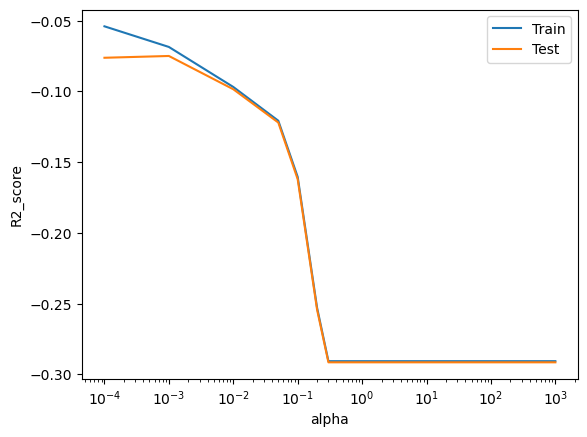

In [72]:
# Plot r2 score v/s alpha values

plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### We can see in the above plot as value of alpha increases, both train and test errors decreases
#### Also, after error value approx 0.05, it remains constant

## 6. Comparison between Ridge and Lasso Regression Models

In [73]:
# Lets create a table which contains all the metrics


lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.943050,0.924836
R2 Score (Test),0.911130,0.908006
RSS (Train),8.289296,10.940460
RSS (Test),3.197218,3.309621
MSE (Train),0.007097,0.009367
MSE (Test),0.010949,0.011334
RMSE (Train),0.084244,0.096782
RMSE (Test),0.104639,0.106463


#### We can see in above table that we get more considerable values of r2 score in Ridge model 

In [74]:
# Lets see changes in coefficients after regularization

# First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [75]:
#Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,0.003802,0.001750
LotArea,0.022189,0.021285
YearRemodAdd,0.025316,0.029071
MasVnrArea,-0.002777,0.000000
BsmtFinSF1,0.011430,0.023652
...,...,...
SaleCondition_AdjLand,0.016761,0.000000
SaleCondition_Alloca,0.016153,0.000000
SaleCondition_Family,-0.019044,-0.000000
SaleCondition_Normal,0.043474,0.035076


In [76]:
# View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
MasVnrArea,-0.002777,0.0
1stFlrSF,0.019658,0.0
LowQualFinSF,0.000000,0.0
BsmtHalfBath,-0.000812,0.0
BedroomAbvGr,0.000959,-0.0
...,...,...
SaleType_Oth,-0.001143,-0.0
SaleType_WD,-0.004076,-0.0
SaleCondition_AdjLand,0.016761,0.0
SaleCondition_Alloca,0.016153,0.0


In [77]:
# View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(306, 2)

#### Now, we can clearly see that out of 384 features from X_train, 306 are removed by lasso feature selection 

In [78]:
# Lets see the remaining selected features by lasso

betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.001750
LotArea                  0.021285
YearRemodAdd             0.029071
BsmtFinSF1               0.023652
BsmtFinSF2               0.002818
                           ...   
GarageQual_Fa           -0.004380
GarageCond_TA            0.004189
SaleType_New             0.021854
SaleCondition_Normal     0.035076
SaleCondition_Partial    0.006470
Name: Lasso, Length: 78, dtype: float64

### Inferences

##### Our final step is to predict top 10 most significant features to predict the value of house by both Ridge and Lasso Reg Model

In [79]:
# Lets view the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.089784
OverallCond_9           0.078531
OverallQual_9           0.078129
GrLivArea               0.075870
OverallQual_8           0.074498
Functional_Typ          0.060839
TotalBsmtSF             0.055064
Exterior1st_BrkFace     0.053283
MSZoning_FV             0.045138
OverallCond_7           0.044962
Name: Ridge, dtype: float64

In [80]:
#  Lets take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor    1.093938
OverallCond_9           1.081697
OverallQual_9           1.081262
GrLivArea               1.078823
OverallQual_8           1.077343
Functional_Typ          1.062727
TotalBsmtSF             1.056608
Exterior1st_BrkFace     1.054728
MSZoning_FV             1.046173
OverallCond_7           1.045988
Name: Ridge, dtype: float64

In [81]:
# Lets view the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.131487
OverallQual_8           0.109263
Neighborhood_Crawfor    0.104752
GrLivArea               0.101413
Functional_Typ          0.059058
TotalBsmtSF             0.054474
OverallQual_7           0.052528
Exterior1st_BrkFace     0.044816
Condition1_Norm         0.041859
CentralAir_Y            0.037858
Name: Lasso, dtype: float64

In [82]:
# Lets take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.140523
OverallQual_8           1.115456
Neighborhood_Crawfor    1.110435
GrLivArea               1.106734
Functional_Typ          1.060837
TotalBsmtSF             1.055985
OverallQual_7           1.053932
Exterior1st_BrkFace     1.045835
Condition1_Norm         1.042747
CentralAir_Y            1.038584
Name: Lasso, dtype: float64

## 7.  Results

#### Variables which are significant in predicting house price are -
- OverallQual_9 , OverallQual_8, Neighborhood_Crawfor, GrLivArea, Functional_Typ, TotalBsmtSF, OverallQual_7, Exterior1st_BrkFace, Condition1_Norm, CentralAir_Y          

#### optimal values of lambda to be considered are - 
- for Ridge Regression = 10
- for Lasso Regression = 0.001